<a href="https://colab.research.google.com/github/rafikbendj/RandomQuotes-Java/blob/master/House_Market_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Market

Allons un peu plus loin dans python

1. Téléchargez les quatres fichiers “superficie.csv” / “nombre_de_sdb.csv” / “nombre_de_chambres.csv” / "house_price.csv"

2. Importez les quatre datasets


In [4]:
import pandas as pd
import numpy as np

superficie = pd.read_csv("superficie.csv", header = None)
nombre_de_sdb = pd.read_csv("nombre_de_sdb.csv", header= None)
nombre_de_chambres = pd.read_csv("nombre_de_chambres.csv", header=None)
prices = pd.read_csv("house_price.csv")

In [5]:
import pandas as pd
prices = pd.read_csv("/content/house_price.csv")
prices

,Unnamed: 0,id,house_price
0,0,14,1918154.0
1,1,30,739142.0
2,2,70,1621938.0
3,3,77,1319862.0
4,4,50,146250.0
...,...,...,...
95,95,15,157223.0
96,96,81,1616313.0
97,97,42,143573.0
98,98,19,974546.0


In [6]:
superficie.head()

,0,1
0,0,28844
1,1,27667
2,2,14742
3,3,28089
4,4,11713


In [7]:
nombre_de_sdb.head()

,0,1
0,0,2
1,1,1
2,2,1
3,3,3
4,4,1


3. Donnez un nom de colonne à ces datasets & supprimez la colonne _Unnamed: 0_

In [8]:
superficie = superficie.rename(columns={0:"id", 1:"superficie"}) 
nombre_de_sdb = nombre_de_sdb.rename(columns={0: 'id', 1:'nombre_de_sdb'})
nombre_de_chambres = nombre_de_chambres.rename(columns={0: 'id', 1:'nombre_de_chambres'})
prices = prices.drop(['Unnamed: 0'], axis = 1)

4. Fusionner ces quatre datasets un seul dataframe (on fera une fusion simplement par ID) qu’on nommera dataset

In [10]:
dataset = (superficie.merge(nombre_de_sdb, left_on="id", right_on="id")
                     .merge(nombre_de_chambres,on="id")
                     .merge(prices, on="id"))
dataset.head()

,id,superficie,nombre_de_sdb,nombre_de_chambres,house_price
0,0,28844,2,1,1421908.0
1,1,27667,1,4,1305091.0
2,2,14742,1,1,164373.0
3,3,28089,3,4,1441714.0
4,4,11713,1,2,108290.0


5. Quelle est la superficie moyenne des maisons de notre dataset ?

In [ ]:
dataset.superficie.mean()

20439.77

6. Quelle est le nombre de chambre médian et moyen ?

In [ ]:
dataset.nombre_de_chambres.mean()

2.42

In [ ]:
dataset.nombre_de_chambres.median()

2.0

In [ ]:
### Grouper sur le nombre de chambres et calculer la moyenne
dataset.groupby("nombre_de_chambres").mean()

,id,superficie,nombre_de_sdb,house_price
nombre_de_chambres,,,,
1,52.260870,22798.695652,1.869565,980774.869565
2,57.387097,19001.483871,2.000000,642086.258065
3,44.555556,19538.037037,2.037037,645904.592593
4,40.315789,21212.315789,1.894737,888045.631579


In [ ]:
### Grouper sur le nombre de chambres et calculer la mediane
dataset.groupby("nombre_de_chambres").median()

,id,superficie,nombre_de_sdb,house_price
nombre_de_chambres,,,,
1,60,23845,2,857706.0
2,58,17938,2,449970.0
3,45,20143,2,561311.0
4,41,21413,2,739142.0


In [11]:
dataset.shape

(100, 5)

7. Quel est le coût moyen d’une maison ?

In [ ]:
dataset.house_price.mean()

767747.87

8. A l'aide de la fonction  dataset.plot.scatter, afficher la superficie en fonction du prix de la maison

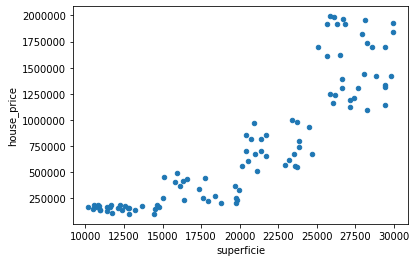

In [ ]:
dataset.plot.scatter(x="superficie", y="house_price")

10. Le coût moyen par chambre ne nous apprend pas grand chose.Tentons de faire des catégories de superficie

  - Créez une nouvelle colonne dans votre dataset qu’on appellera taille_maison
Créez trois catégories qui respectivement correspondront à :

      - “très grande” == “une maison dont la taille est supérieure à 25 000 sqrt_feet”
      
      - “grande” == “une maison dont la taille est comprise entre 20 000 et 25 000 sqrt_feet”
      
      - “moyenne” == “une maison dont la taille est comprise entre 15 000 et 20 000 sqrt_feet”
    
      - "petite" == "une maison dont la taille est comprise entre 10 000 et 15 000 sqrt_feet” 
    
      - "très petite" == une maison dont la taille est inférieure à 10 000 sqrt_feet”
      
Remplissez les lignes correspondantes dans la colonne taille_maison

In [13]:
 # Methode Lambda
dataset.superficie.apply(lambda x: "Très Grande" if x>25000 
                         else "Grande" if x>20000
                         else "Moyenne" if x>15000
                         else "Petite")

0     Très Grande
1     Très Grande
2          Petite
3     Très Grande
4          Petite
         ...     
95         Petite
96         Petite
97        Moyenne
98         Grande
99         Petite
Name: superficie, Length: 100, dtype: object

11. Quel est le coût moyen d’une maison en fonction de sa catégorie de superficie ?


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


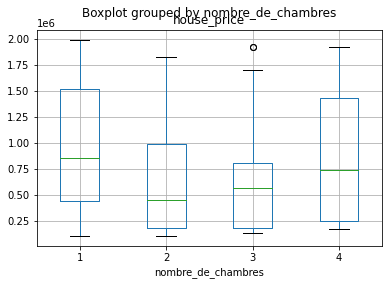

In [16]:
dataset.boxplot(column=["house_price"], by="nombre_de_chambres")